# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [1]:
# Your code here. 
import pandas as pd
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

In [2]:
student_data 

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

In [3]:
import pandas as pd
import numpy as np

# Viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Modelling libraries
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression #sci-kit for learning, science-kit, sklearn

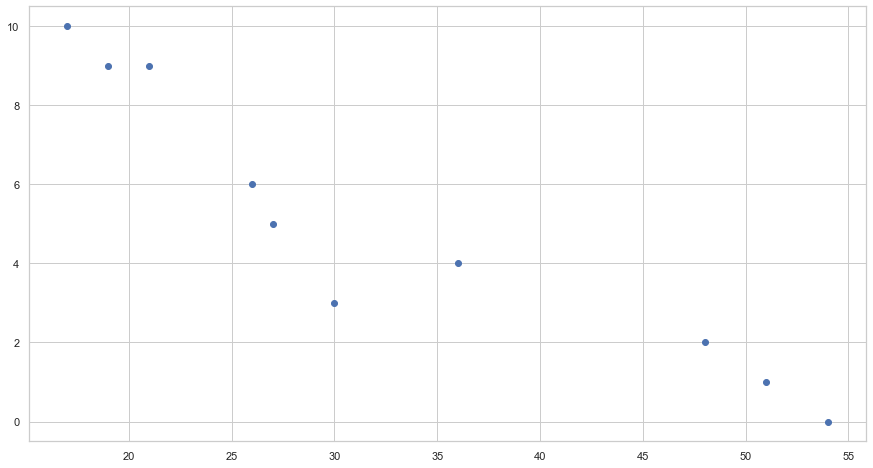

In [4]:
plt.scatter(student_data['Age'], student_data['Tardies'])

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [5]:
# Your response here. 

# Yes you can see a trend. 
# The hypothesus is that the younger the student is, the later they will be 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [6]:
# Your response here.

student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [7]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


The covariance between "Age" and "Tardies" is -45.566667, which means that there is a negative relationship between the two variables. This suggests that as age increases, tardiness tends to decrease and vice versa.
The correlation matrix shows that the correlation coefficient between "Age" and "Tardies" is -0.939163, which further confirms the negative relationship between the two variables. 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [8]:
# Your response here.

lr = LinearRegression()

In [9]:
lr.fit(
    X = student_data[["Age"]], # These are the variables
    y = student_data.Tardies # This is OUR ONE TARGET
)

LinearRegression()

In [10]:
[i for i in dir(lr)][:1]

['__abstractmethods__']

In [11]:
lr.intercept_

12.888803363135771

In [12]:
lr.coef_

array([-0.24282077])

In [13]:
student_data["prediction_through_scikitlearn"] = lr.coef_[0] * student_data.Age + lr.intercept_
student_data

,Age,Tardies,prediction_through_scikitlearn
0,17,10,8.760850
1,51,1,0.504944
2,27,5,6.332643
3,21,9,7.789567
4,36,4,4.147256
5,48,2,1.233406
6,19,9,8.275209
7,26,6,6.575463
8,54,0,-0.223518
9,30,3,5.604180


In [14]:
student_data["error_scikitlearn"] = (student_data.Tardies - student_data.prediction_through_scikitlearn).abs()
student_data

,Age,Tardies,prediction_through_scikitlearn,error_scikitlearn
0,17,10,8.760850,1.239150
1,51,1,0.504944,0.495056
2,27,5,6.332643,1.332643
3,21,9,7.789567,1.210433
4,36,4,4.147256,0.147256
5,48,2,1.233406,0.766594
6,19,9,8.275209,0.724791
7,26,6,6.575463,0.575463
8,54,0,-0.223518,0.223518
9,30,3,5.604180,2.604180


In [15]:
student_data.error_scikitlearn.mean()

0.9319083427082718

Plot your regression model on your scatter plot.

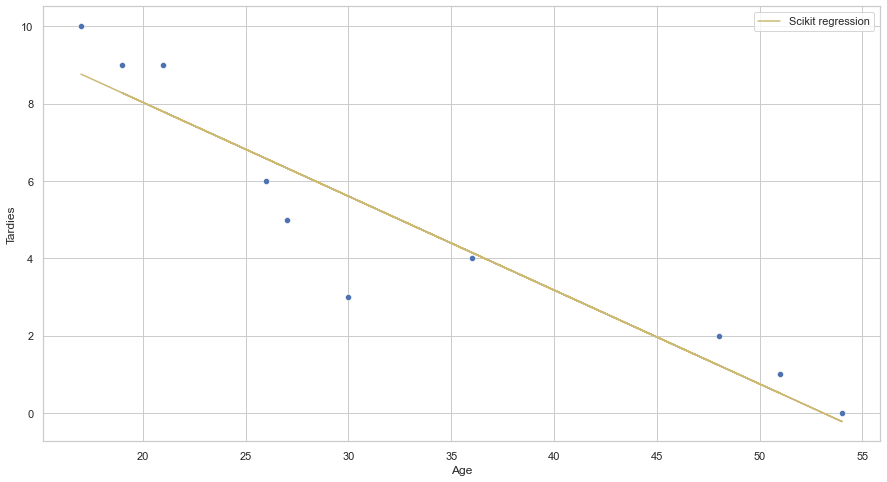

In [16]:
# Your code here.


sns.scatterplot(x=student_data.Age , y=student_data.Tardies)
plt.plot(student_data.Age, student_data.prediction_through_scikitlearn, label="Scikit regression", color="y")
plt.legend();

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [17]:
student_data["avg"] = student_data.Tardies.mean()
student_data

,Age,Tardies,prediction_through_scikitlearn,error_scikitlearn,avg
0,17,10,8.760850,1.239150,4.9
1,51,1,0.504944,0.495056,4.9
2,27,5,6.332643,1.332643,4.9
3,21,9,7.789567,1.210433,4.9
4,36,4,4.147256,0.147256,4.9
5,48,2,1.233406,0.766594,4.9
6,19,9,8.275209,0.724791,4.9
7,26,6,6.575463,0.575463,4.9
8,54,0,-0.223518,0.223518,4.9
9,30,3,5.604180,2.604180,4.9


In [18]:
RSS = ((student_data.Tardies - student_data.prediction_through_scikitlearn)**2).sum()
RSS

13.319201847356268

In [19]:
TSS = ((student_data.Tardies - student_data.avg)**2).sum()
TSS

112.9

In [20]:
r2 = 1 - (RSS/TSS)
r2 

0.8820265558250109

I think that the model is quite good. We can see that the r2 number is close to 1 and the regression line fits closesly to all of the observations

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [21]:
# Import any libraries you may need & the data

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [22]:
# Your response here. 

df = pd.read_csv('vehicles.csv', index_col = [0])
df_corr= df.corr()

df_corr 


Engine Displacement, City MPG, Highway MPG

/var/folders/6b/73zmt1sx3c30hcgymp7n2zw40000gn/T/ipykernel_58302/4125916220.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr= df.corr()


,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [23]:
def highlight_cells(val):
    color = 'grey' if val == 1.000000 else 'green' if val > 0.9 else 'lightgreen' if val > 0.7  and val <= 0.9 else 'red' if val < -0.9 else 'lightcoral' if val < -0.5 and val >= -0.9 else ''
    return f'background-color: {color}'
df_corr = df_corr.drop(columns=['Engine Displacement', 'City MPG', 'Highway MPG'])
df_corr = df_corr.style.applymap(highlight_cells)

In [24]:
df_corr

,Year,Engine Displacement,Cylinders,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.037876,0.082469,-0.221084,0.161818,0.267259,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,1.000000,0.901858,0.789752,-0.740317,-0.715039,-0.746782,0.803520,0.769678
Cylinders,0.082469,0.901858,1.000000,0.739517,-0.703866,-0.650287,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.789752,0.739517,1.000000,-0.877752,-0.909664,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.740317,-0.703866,-0.877752,1.000000,0.923856,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.715039,-0.650287,-0.909664,0.923856,1.000000,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.746782,-0.698648,-0.909743,0.985457,0.969392,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.803520,0.752393,0.986189,-0.894139,-0.926405,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.769678,0.778153,0.916208,-0.858645,-0.851404,-0.875185,0.930865,1.000000


In [50]:
# Your response here. 

df2 = pd.read_csv('vehicles.csv', index_col = [0])
df_corr_unstyled= df2.corr()
df_corr_unstyled = df_corr_unstyled.drop(columns=['Engine Displacement', 'City MPG', 'Highway MPG'])

df_corr_unstyled

/var/folders/6b/73zmt1sx3c30hcgymp7n2zw40000gn/T/ipykernel_58302/3759222166.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr_unstyled= df2.corr()


,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,0.901858,0.789752,-0.746782,0.803520,0.769678
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.703866,-0.877752,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.650287,-0.909664,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


In [51]:
strongest_corr = df_corr_unstyled['CO2 Emission Grams/Mile'].sort_values(ascending=False)[1]
strongest_var = df_corr_unstyled[df_corr_unstyled['CO2 Emission Grams/Mile'] == strongest_corr].index[0]
print(f"The variable most strongly correlated with 'CO2 Emission Grams/Mile' is {strongest_var}, with a correlation coefficient of {strongest_corr:.2f}")


The variable most strongly correlated with 'CO2 Emission Grams/Mile' is Fuel Barrels/Year, with a correlation coefficient of 0.99


In [52]:
weakest_corr = df_corr_unstyled['CO2 Emission Grams/Mile'].abs().sort_values()[0]
weakest_var = df_corr_unstyled[df_corr_unstyled['CO2 Emission Grams/Mile'].abs() == weakest_corr].index[0]
print(f"The variable with the weakest correlation (closest to zero) with 'CO2 Emission Grams/Mile' is {weakest_var}, with a correlation coefficient of {weakest_corr:.2f}")


The variable with the weakest correlation (closest to zero) with 'CO2 Emission Grams/Mile' is Year, with a correlation coefficient of 0.22


In [53]:
df_car = df_corr_unstyled

In [54]:
df_car

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,0.901858,0.789752,-0.746782,0.803520,0.769678
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.703866,-0.877752,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.650287,-0.909664,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


In [55]:
df_car = df_car.rename(columns={
    'Fuel Barrels/Year': 'FuelBarrels',
    'Combined MPG': 'CombinedMPG',
    'CO2 Emission Grams/Mile': 'CO2',
    'Fuel Cost/Year': 'FuelCost'
})

df_car

,Year,Cylinders,FuelBarrels,CombinedMPG,CO2,FuelCost
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300,-0.091913
Engine Displacement,0.037876,0.901858,0.789752,-0.746782,0.803520,0.769678
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393,0.778153
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189,0.916208
City MPG,0.161818,-0.703866,-0.877752,0.985457,-0.894139,-0.858645
Highway MPG,0.267259,-0.650287,-0.909664,0.969392,-0.926405,-0.851404
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229,-0.875185
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000,0.930865
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,0.930865,1.000000


In [56]:
df_car.columns

Index(['Year', 'Cylinders', 'FuelBarrels', 'CombinedMPG', 'CO2', 'FuelCost'], dtype='object')

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [57]:
# Your response here. 

results = smf.ols("CO2 ~ Year + Cylinders + FuelBarrels + CombinedMPG + FuelCost", data=df_car).fit()


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [58]:
# Your response here. 

results.summary()

/Users/tom/miniconda3/envs/ironhack/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CO2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.433e+04
Date:                Tue, 28 Feb 2023   Prob (F-statistic):           9.20e-07
Time:                        17:10:12   Log-Likelihood:                 34.153
No. Observations:                   9   AIC:                            -56.31
Df Residuals:                       3   BIC:                            -55.12
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0171      0.025      0.693      0.538      -0.061       0.096
Year           -0.0339      0.028     -1.203      0.315      -0.124       0.056
Cylinders       0.0227      0.027      0.832      0.467      -0.064       0.109
FuelBarrels     0.6440      0.264      2.435      0.093      -0.198       1.486
CombinedMPG    -0.3030      0.307     -0.988      0.396      -1.279       0.673
FuelCost        0.0376      0.100      0.375      0.733      -0.281       0.356
==============================================================================
Omnibus:                        0.595   Durbin-Watson:                   2.740
Prob(Omnibus):                  0.743   Jarque-Bera (JB):                0.555
Skew:                          -0.427   Prob(JB):                        0.758
Kurtosis:                       2.134   Cond. No.                         213.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [77]:
# Your code here. 

import pandas as pd

data = {'X': [1, 3, 4, 6, 8, 9, 11, 14],
        'Y': [1, 2, 4, 4, 5, 7, 8, 13]}

df = pd.DataFrame(data)
df 

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [59]:
# Your code here.
import matplotlib.pyplot as plt
import scipy.stats as stats

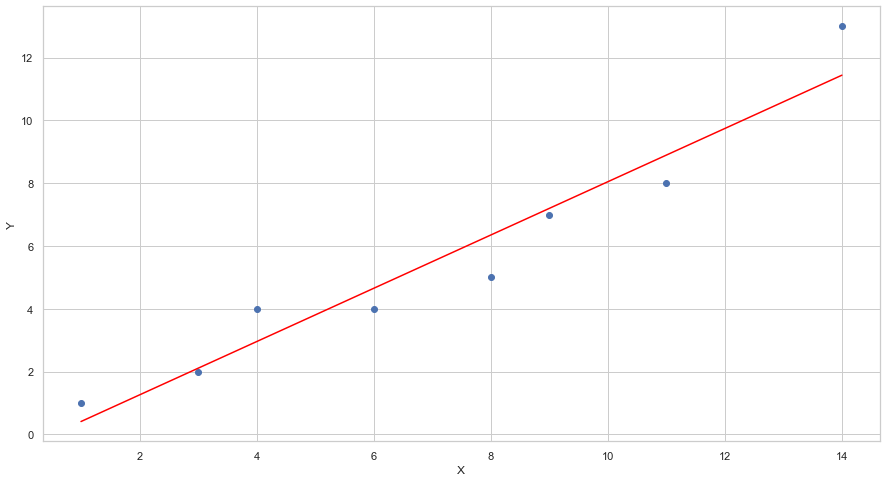

In [78]:
# Create the scatter plot
plt.scatter(df['X'], df['Y'])

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df['X'], df['Y'])
x = range(int(df['X'].min()), int(df['X'].max()) + 1)
y = slope * x + intercept
plt.plot(x, y, color='red')

# Add axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [70]:
# The slope represents the change in Y per unit change in X
print(f"Slope: {slope:.2f}")

Slope: 0.85


In [71]:
#the intercept represents the Y value when X is equal to 0.
print(f"Intercept: {intercept:.2f}")

Intercept: -0.44


In [72]:
#The r-value represents the strength and direction of the correlation between X and Y
print(f"r-value: {r_value:.2f}")

r-value: 0.97


In [73]:
#the p-value represents the probability that the observed correlation could have occurred by chance. 
print(f"p-value: {p_value:.2f}")

p-value: 0.00


In [74]:
#The standard error represents the average amount by which the predicted Y values deviate from the actual Y values.
print(f"standard error: {std_err:.2f}")

standard error: 0.09


The scatter plot shows a strong positive linear relationship between the X and Y variables. As X increases, Y also tends to increase. This is supported by the high correlation coefficient (r-value) of 0.97 and the low p-value of 0.00 from the linear regression, indicating a significant relationship between the variables.

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

The bottom observation is an outlier as it is the furthest away from the regression line. I am going to drop it from the data and redo the regresion

In [79]:
df = df.drop(df.index[-1])
df

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8


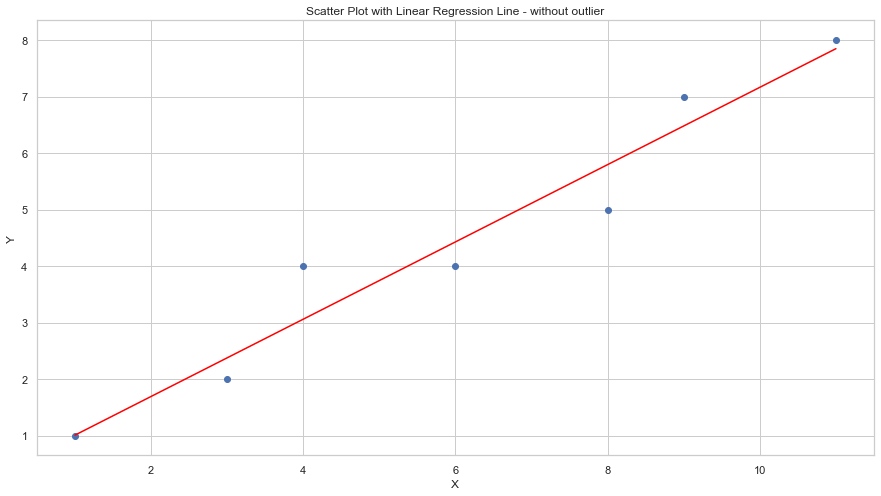

In [80]:
# Create the scatter plot
plt.scatter(df['X'], df['Y'])

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(df['X'], df['Y'])
x = range(int(df['X'].min()), int(df['X'].max()) + 1)
y = slope * x + intercept
plt.plot(x, y, color='red')

# Add axis labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot with Linear Regression Line - without outlier')
plt.show()


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [81]:
# Your response here. 
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"r-value: {r_value:.2f}")
print(f"p-value: {p_value:.2f}")
print(f"standard error: {std_err:.2f}")


Slope: 0.68
Intercept: 0.32
r-value: 0.97
p-value: 0.00
standard error: 0.07


In [82]:
df_results = pd.DataFrame({'Slope': [0.85, 0.68],
                           'Intercept': [-0.44, 0.32],
                           'r-value': [0.97, 0.97],
                           'p-value': [0.00, 0.00],
                           'standard error': [0.09, 0.07]},
                          index=['With Outlier', 'Without Outlier'])

df_results

                 Slope  Intercept  r-value  p-value  standard error
With Outlier      0.85      -0.44     0.97      0.0            0.09
Without Outlier   0.68       0.32     0.97      0.0            0.07


The removal of an outlier point from the data set resulted in a decrease of the slope and intercept of the linear regression line, but the r-value remained strong. This suggests that the data may have a linear relationship but the outlier point was pulling the line away from the true trend.